The objective of this project is to find out wether factor like gender, the race/etricity of the student, the level of parents education and more affect the score of the student or not. At last, create a model which can predict the student score by taking in to account all factors.

In [1]:
# Import library 

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder #for categorical variable
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
#Load data

student_data = pd.read_csv("./datasets_74977_169835_StudentsPerformance.csv")
student_data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#Explore the data
print(16*"-" + "No. of rows and columns" + 16*"-" + "\n")
print("No of Rows {0}, No. of columns {1}".format(student_data.shape[0],student_data.shape[1])+"\n")
print(16*"-" + "info about the data" + 16*"-" + "\n")
student_data.info()

----------------No. of rows and columns----------------

No of Rows 1000, No. of columns 8

----------------info about the data----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


As we can see, we have total 1000 data of the student and no of colums (attribute) is 8. Where except all score value, all cloumns aare non integer value. That means they are categorial attribute. We do not have any null or missing values available.

In [4]:
print(16*"-" + "Description of the integer attributes" + 16*"-")
student_data.describe()

----------------Description of the integer attributes----------------


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Above data is for the numeric attributes. Average value of math score, reading score and writing score is almost same. 

In [5]:
print(16*"-" + "the number of categories present in each categorical variable" + 16*"-")
student_data.select_dtypes('object').nunique()

----------------the number of categories present in each categorical variable----------------


gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

The above output represent the total number of categories present in each object type of attribute.

In [6]:
#to find out the various categories present in the different categorical variable

for col in student_data[['gender','race/ethnicity','parental level of education','lunch','test preparation course']]:
    print("categories present in " + col+":")
    print(student_data[col].unique())
    print("\n")
        

categories present in gender:
['female' 'male']


categories present in race/ethnicity:
['group B' 'group C' 'group A' 'group D' 'group E']


categories present in parental level of education:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


categories present in lunch:
['standard' 'free/reduced']


categories present in test preparation course:
['none' 'completed']




In [7]:
# sns.heatmap(student_data[['math score','reading score','writing score']])
student_data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [8]:
#create categorical data(string data) in to number

data_categorial=OneHotEncoder(handle_unknown='ignore').fit_transform(student_data.drop(['math score','reading score','writing score'],axis=1))


In [50]:
#Split data in to training and test
independent_varible=student_data.drop(['math score','reading score','writing score'],axis=1)
dependent_variable=student_data[['math score','reading score','writing score']]
X_train, X_test, y_train, y_test = train_test_split(data_categorial, dependent_variable,
                                                     test_size=0.33, random_state=44)


In [51]:
#Build the model
from sklearn import linear_model
model = LinearRegression()
model=LinearRegression()
model.fit(X_train, y_train)
pred=model.predict(X_test)
print("R2 score :",r2_score(y_test, pred))
print("Mean squared error: ",mean_squared_error(y_test, pred))

R2 score : 0.2605924607886712
Mean squared error:  166.88222534673116


R2 score is very low and Mean squared error is high. Linear regession model is not good for this data set.Let's draw a learning curve for this data.

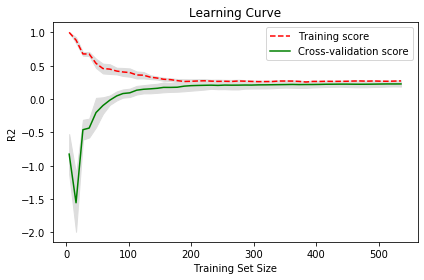

In [52]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(estimator = LinearRegression()
                                                              ,X = X_train
                                                              ,y = y_train
                                                              ,train_sizes = np.linspace(0.01, 1.0, 50)
                                                              , cv = 5, scoring='r2')
# print('Training scores:\n\n', train_scores)
# print('\n', '-' * 70) # separator to make the output easy to read
# print('\nValidation scores:\n\n', validation_scores)

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(validation_scores, axis=1)
test_std = np.std(validation_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="red",  label="Training score")
plt.plot(train_sizes, test_mean, color="green", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("R2"), plt.legend(loc="best")
plt.tight_layout()
plt.show()



I have plot a learning cuvre for taning and Testing data. As we can see, increasing traning size does not help to improve R2 value. This model is highly baised model. Now let's try to change the algorithm and see


In [53]:
#Randomforest for multioutput regression.

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor

knn = LinearRegression()
# knn=RandomForestRegressor(n_estimators=10)
#model = KNeighborsRegressor()
#knn = KNeighborsRegressor()
model = MultiOutputRegressor(knn)
#model=MultiOutputRegressor(Ridge(random_state=1))

model.fit(X_train, y_train)
pred=model.predict(X_test)
print("R2 score :",r2_score(y_test, pred))
print("Mean squared error: ",mean_squared_error(y_test, pred))



R2 score : 0.2605924607886712
Mean squared error:  166.88222534673116


In [56]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

Using TensorFlow backend.
